# Testing hypotheses: Expected number of goals by a home team is the same that of the away team

**date**
: 2021-04-12

In [18]:
from src.data import Data
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Setup

In [2]:
# import data
df = Data.load_ft_goals_17_18()

## 2. Home goals in 2017 and 2018

### Hypothesis

Let $X$ represent the number of goals scored by the home team in an EPL football game.

Let the hypothesis be that the mean number of goals scored by the home team in 2017 $\mu_{X_{2017}}$ is equal to that in 2018 $\mu_{X_{2018}}$.
That is

$$
\begin{aligned}
  &H_{0} : \mu_{X_{2017}} = \mu_{X_{2018}} \\
  &H_{1} : \mu_{X_{2017}} \neq \mu_{X_{2018}}.
\end{aligned}
$$

### Methodology

The data will be described using a table of summary results, followed by a comparision side-by-side bar chart of the data.

A *two-sample* $z$-*test* is then performed to test the hypotheses.
The test statistic is the $z$-value, which is defined as

We require the $z$-value to perform a *two-sample* $z$-*test*, which is defined as

$$
Z = \frac{\mu_{1} - \mu_{2}}{\text{ESE}},
$$

where

$$
\text{ESE} = \sqrt{\frac{s^{2}_{1}}{n_{1}} + \frac{s^{2}_{2}}{n_{2}}}.
$$

The data was processed using **Excel.**
It was plotted and analysed plotted using **Python.**

### Results

A summary table of the number of goals scored by the home team in 2017/18 and 2018/19 is shown below.

In [4]:
df[["FTHG_2017", "FTHG_2018"]].describe().T

,count,mean,std,min,25%,50%,75%,max
FTHG_2017,380.0,1.531579,1.340087,0.0,1.0,1.0,2.0,7.0
FTHG_2018,380.0,1.568421,1.312836,0.0,1.0,1.0,2.0,6.0


-- comment

A comparision side-by-side bar chart of the number of goals scored by the home team in 2017/18 and 2018/19 is shown below.

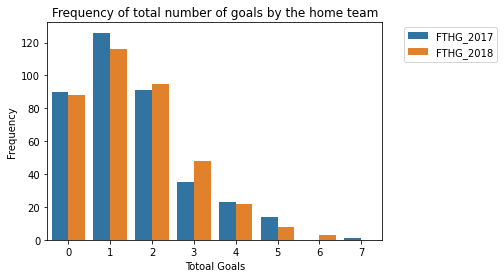

In [20]:
# melt the data
plt_df = pd.melt(
    frame=df,
    value_vars=["FTHG_2017", "FTHG_2018"]
)

# create the ax
ax = sns.countplot(
    data=plt_df,
    x="value",
    hue="variable"
)

# customise plot
ax.set(
    title="Frequency of total number of goals by the home team",
    xlabel="Totoal Goals",
    ylabel="Frequency"
)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

-- comment

We know the following from the summary table above.

$\mu_{1} = \mu_{X_{2017}} \simeq \overline{X}_{2017} \simeq 1.53$;

$\mu_{2} = \mu_{X_{2018}} \simeq \overline{X}_{2018} \simeq  1.56$;

$S^{2}_{1} = S^{2}_{X_{2017}} \simeq 1.34^{2} \simeq 1.80$;

$S^{2}_{2} = S^{2}_{X_{2018}} \simeq 1.31^{2} \simeq 1.72$;

$n_{1}, n_{2} = n = 380$.

We can then restate the test statistic $Z$ as

$$
Z \simeq \frac{\overline{X}_{2017} - \overline{X}_{2018}}{\sqrt{\frac{S^{2}_{X_{2017}}}{n} + \frac{S^{2}_{X_{2018}}}{n}}}
$$

In [21]:
# calculate z
(1.53 - 1.56) / ((1.8 + 1.72)/380)**0.5

-0.31170353047261284

This gives us a $z$-value of approximately -0.3117.

In [24]:
# calculate p
2 * norm().cdf(-0.3117)

0.7552685279572038

And so the $p$-value for this test is approximately 0.7553.

### Discussion

With a $p$-value > 0.1, there is little to no evidence evidence against the null hypothesis.
We therefore do **not** reject the null hypothesis and conclude that there is no evidence that the expected number of goals scored by the home team in 2017 is not equal to that in 2018.

## 3. Away goals in 2017 and 2018

### Hypothesis

Let $Y$ represent the number of goals scored by the away team in an EPL football game.

Let the hypothesis be that the mean number of goals scored by the away team in 2017 $\mu_{Y_{2017}}$ is equal to that in 2018 $\mu_{Y_{2018}}$.
That is

$$
\begin{aligned}
  &H_{0} : \mu_{Y_{2017}} = \mu_{Y_{2018}} \\
  &H_{1} : \mu_{Y_{2017}} \neq \mu_{Y_{2018}}.
\end{aligned}
$$

### Methodology

The data will be described using a table of summary results, followed by a comparision side-by-side bar chart of the data.

A *two-sample* $z$-*test* is then performed to test the hypotheses.
The data was processed using **Excel.**
It was plotted and analysed plotted using **Python.**

### Results

A summary table of the number of goals scored by the away team in 2017/18 and 2018/19 is shown below.

In [26]:
df[["FTAG_2017", "FTAG_2018"]].describe().T

,count,mean,std,min,25%,50%,75%,max
FTAG_2017,380.0,1.147368,1.177793,0.0,0.0,1.0,2.0,6.0
FTAG_2018,380.0,1.252632,1.180031,0.0,0.0,1.0,2.0,6.0


-- comment

A comparision side-by-side bar chart of the number of goals scored by the away team in 2017/18 and 2018/19 is shown below.

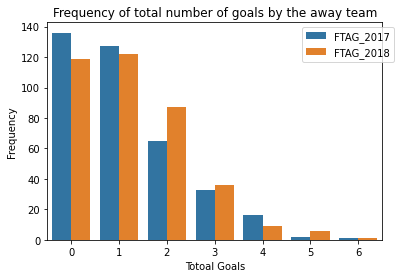

In [25]:
# melt the data
plt_df = pd.melt(
    frame=df,
    value_vars=["FTAG_2017", "FTAG_2018"]
)

# create the ax
ax = sns.countplot(
    data=plt_df,
    x="value",
    hue="variable"
)

# customise plot
ax.set(
    title="Frequency of total number of goals by the away team",
    xlabel="Totoal Goals",
    ylabel="Frequency"
)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

-- comment

We know the following from the summary table above.

$\mu_{1} = \mu_{Y_{2017}} \simeq \overline{Y}_{2017} \simeq 1.15$;

$\mu_{2} = \mu_{Y_{2018}} \simeq \overline{Y}_{2018} \simeq  1.25$;

$S^{2}_{1} = S^{2}_{Y_{2017}} \simeq 1.18^{2} \simeq 1.39$;

$S^{2}_{2} = S^{2}_{Y_{2018}} \simeq 1.18^{2} \simeq 1.39$;

$n_{1}, n_{2} = n = 380$.

We can then restate the value for $Z$ as

$$
Z \simeq \frac{\overline{Y}_{2017} - \overline{Y}_{2018}}{\sqrt{\frac{S^{2}_{Y_{2017}}}{n} + \frac{S^{2}_{Y_{2018}}}{n}}}
$$

In [29]:
# calculate z
(1.15 - 1.25) / ((1.39 + 1.39)/380)**0.5

-1.1691477557691954

This gives us a $z$-value of approximately -1.1691.

In [30]:
# calculate p
2 * norm().cdf(-1.1691)

0.2423633439270504

And so the $p$-value for this test is approximately 0.2424.

### Discussion

With a $p$-value > 0.1, there is little to no evidence evidence against the null hypothesis.
We therefore do **not** reject the null hypothesis and conclude that there is no evidence that the expected number of goals scored by the away team in 2017 is not equal to that in 2018.

## 4. Proportion of goals by the home team

### Hypothesis

Let $P$ represent the proportion of total goals across the scored by the home team in a football game.

Let the hypothesis be that the proportion of total goals across the scored by the home team in a football game in 2017 is equal to that in 2018.
That is

$$
\begin{aligned}
  &H_{0} : P_{2017} = P_{2018} \\
  &H_{1} : P_{2017} \neq P_{2018}.
\end{aligned}
$$

### Methodology